<a href="https://colab.research.google.com/github/cristhian-espitia/Study_Penguins/blob/main/PLANTILLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importación de librerias a manejar


In [ ]:
!pip install --upgrade pip
!pip install numpy
!pip install pandas
!pip install1 seaborn
!pip install matplotlib
!pip install empiricaldist
!pip install statsmodels
!pip install scikit-learn
!pip install pyjanitor

In [3]:
import empiricaldist
# import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
import warnings
from IPython.core.display import display, HTML
import math

#Quitar advertencias en los codigos
warnings.filterwarnings('ignore')

# Ver Datasets completos
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.2f}'.format

## Establecer apariencia general de los gráficos

In [4]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

### CARGAMOS LOS DATOS

In [5]:
penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv', sep=',')
penguin_df 

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007
5,Adelie,Torgersen,39.30,20.60,190.00,3650.00,male,2007
6,Adelie,Torgersen,38.90,17.80,181.00,3625.00,female,2007
7,Adelie,Torgersen,39.20,19.60,195.00,4675.00,male,2007
8,Adelie,Torgersen,34.10,18.10,193.00,3475.00,NaN,2007
9,Adelie,Torgersen,42.00,20.20,190.00,4250.00,NaN,2007


# CONOCIENDO LOS DATOS

In [ ]:
print (penguin_df.columns)
print ('-----------------------------')

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')
-----------------------------


In [ ]:
penguin_df.shape

(344, 8)

In [ ]:
penguin_df.dtypes 

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

# QUITAMOS ESPACIOS QUE PUEDAN HABER EN NUESTRA TABLA

In [6]:
penguin_df.columns=penguin_df.columns.str.replace(' ','')

# REVISANDO SI HAY VALORES NULOS

In [ ]:
penguin_df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
penguin_df[penguin_df.bill_depth_mm.isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
271,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,2009


In [ ]:
penguin_df[penguin_df.sex.isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
8,Adelie,Torgersen,34.10,18.10,193.00,3475.00,NaN,2007
9,Adelie,Torgersen,42.00,20.20,190.00,4250.00,NaN,2007
10,Adelie,Torgersen,37.80,17.10,186.00,3300.00,NaN,2007
11,Adelie,Torgersen,37.80,17.30,180.00,3700.00,NaN,2007
47,Adelie,Dream,37.50,18.90,179.00,2975.00,NaN,2007
178,Gentoo,Biscoe,44.50,14.30,216.00,4100.00,NaN,2007
218,Gentoo,Biscoe,46.20,14.40,214.00,4650.00,NaN,2008
256,Gentoo,Biscoe,47.30,13.80,216.00,4725.00,NaN,2009
268,Gentoo,Biscoe,44.50,15.70,217.00,4875.00,NaN,2009


## PROPORCION DE VALORES NULOS EN NUESTRA TABLA

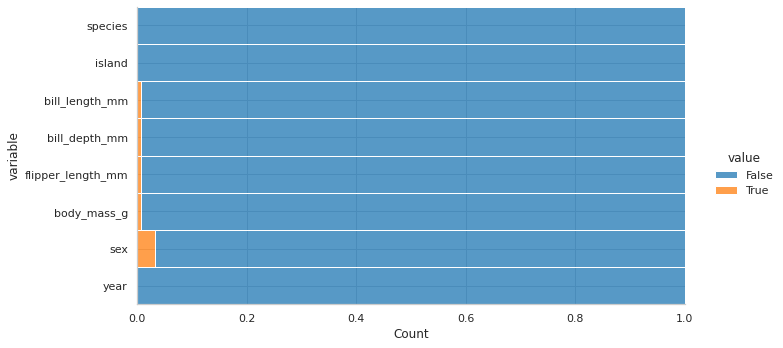

In [ ]:
(
    penguin_df
    .isnull()
    .melt()
    .pipe(
        lambda df: (
            sns.displot(
                data = df,
                y='variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
           )
        )
    )
)

#VISUALIZACION DE DATOS NULOS EN TODO EL CONJUNTO DE DATOS

<AxesSubplot:>

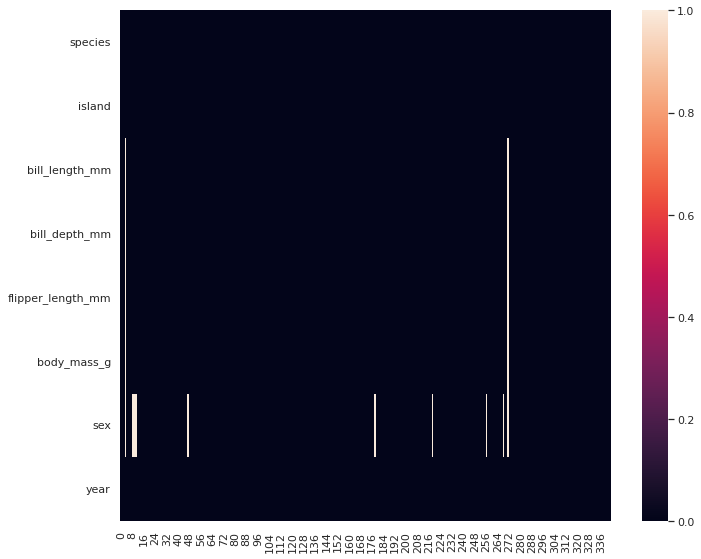

In [ ]:
(
    penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: (
            sns.heatmap(
                data = df               
           )
        )
    )
)

# ELIMINANDO DATOS NULOS QUE NO APORTAN

In [7]:
processed_penguin_df=penguin_df.dropna()
processed_penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.10,18.70,181.00,3750.00,male,2007
1,Adelie,Torgersen,39.50,17.40,186.00,3800.00,female,2007
2,Adelie,Torgersen,40.30,18.00,195.00,3250.00,female,2007
4,Adelie,Torgersen,36.70,19.30,193.00,3450.00,female,2007
5,Adelie,Torgersen,39.30,20.60,190.00,3650.00,male,2007
6,Adelie,Torgersen,38.90,17.80,181.00,3625.00,female,2007
7,Adelie,Torgersen,39.20,19.60,195.00,4675.00,male,2007
12,Adelie,Torgersen,41.10,17.60,182.00,3200.00,female,2007
13,Adelie,Torgersen,38.60,21.20,191.00,3800.00,male,2007
14,Adelie,Torgersen,34.60,21.10,198.00,4400.00,male,2007


In [ ]:
processed_penguin_df.shape

(333, 8)

### CONTEOS Y PROPORCIONES

In [ ]:
processed_penguin_df.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.00,333.00,333.00,333.00,333,333.00
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.99,17.16,200.97,4207.06,NaN,2008.04
std,NaN,NaN,5.47,1.97,14.02,805.22,NaN,0.81
min,NaN,NaN,32.10,13.10,172.00,2700.00,NaN,2007.00
25%,NaN,NaN,39.50,15.60,190.00,3550.00,NaN,2007.00
50%,NaN,NaN,44.50,17.30,197.00,4050.00,NaN,2008.00
75%,NaN,NaN,48.60,18.70,213.00,4775.00,NaN,2009.00


In [ ]:
# Cambiamos nuestros datos tipo object por category para poderlos trabajar mejor
processed_penguin_df.astype({'species':'category', 
                             'island':'category',
                             'sex':'category'}).describe(include='category')

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


#VISUALIZACIONES CONTEOS

<AxesSubplot:>

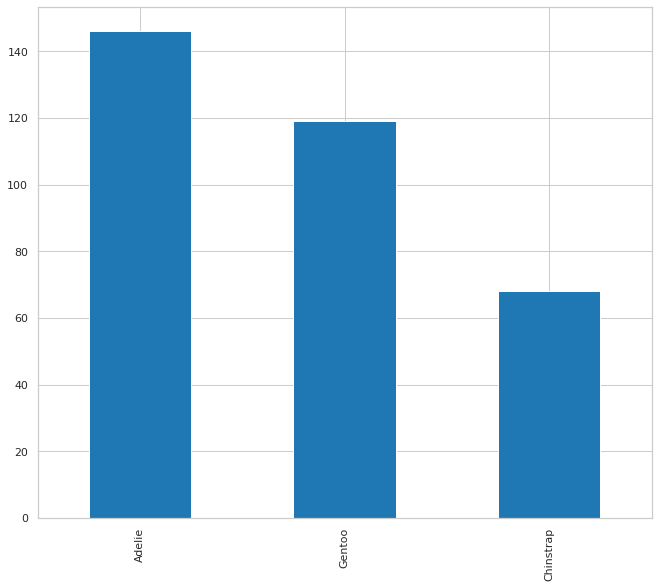

In [ ]:
(
    processed_penguin_df
.species
.value_counts()
.plot (
    kind='bar'
    
  )
)

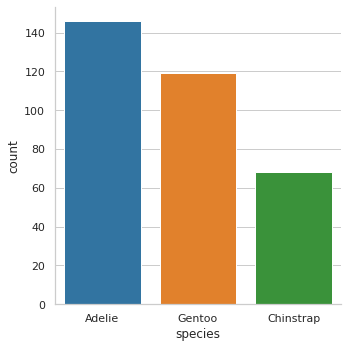

In [ ]:
sns.catplot(
    data=processed_penguin_df,
    x='species',
    kind= 'count'
)

<AxesSubplot:xlabel='species', ylabel='count'>

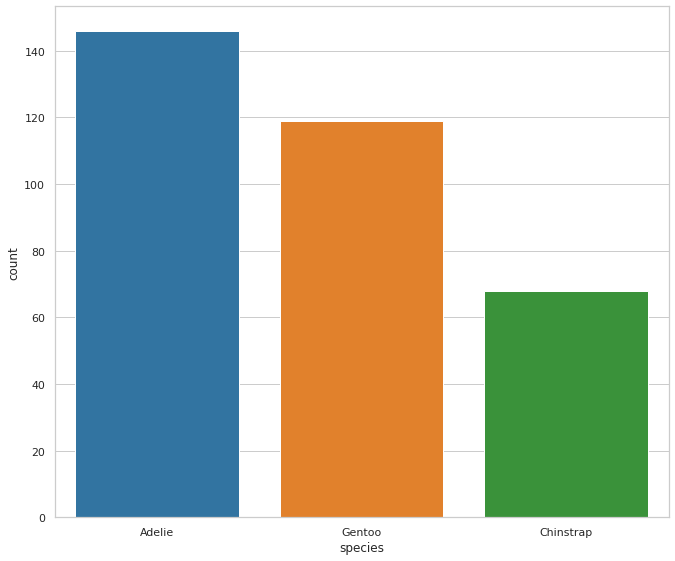

In [ ]:
#Es resume lo de arriba , con un solo codigo realiza el conteo de la columna señalada y me lo grafica
(
    processed_penguin_df
    .value_counts ('species', sort=True)
    .reset_index(name='count')
    .pipe(
        lambda df: (
            sns.barplot(
                 data=df,
                 x='species',
                 y= 'count'
           )
        )
    )
)

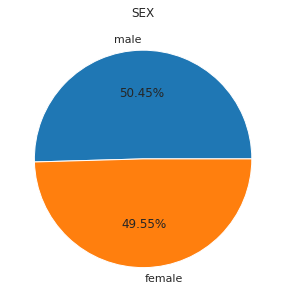

In [ ]:
# Contamos los datos de "sex"
recuentos=processed_penguin_df['sex'].value_counts()
# Crear el gráfico de pastel con porcentajes
graficos = recuentos.plot(kind='pie', autopct='%2.2f%%',figsize=(5,5))
# Mostrar los porcentajes en el centro del gráfico
graficos.set_title("SEX")
graficos.set_ylabel("")
# Mostrar el gráfico
plt.show()

<AxesSubplot:xlabel='count', ylabel='island'>

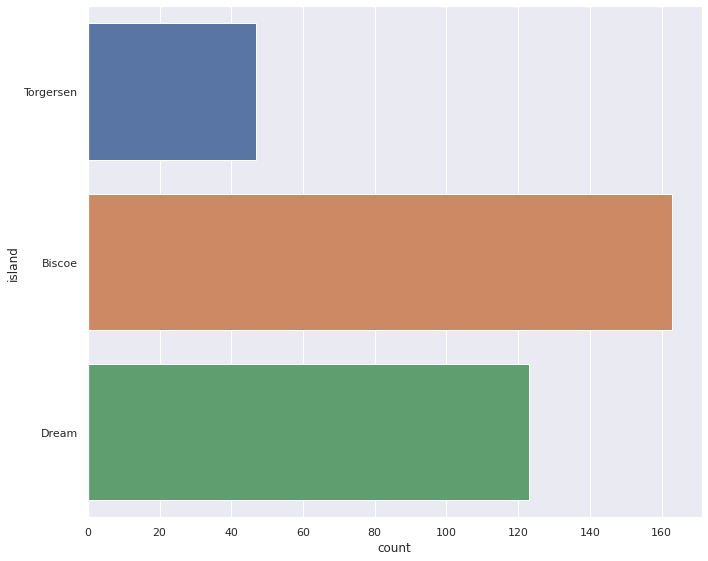

In [ ]:
sns.set_theme()
sns.countplot(y='island', data=processed_penguin_df)

#MEDIA


In [ ]:
#MEDIA
processed_penguin_df.mean().reset_index(name='Media')

,index,Media
0,bill_length_mm,43.99
1,bill_depth_mm,17.16
2,flipper_length_mm,200.97
3,body_mass_g,4207.06
4,year,2008.04


In [ ]:
#MEDIANA
processed_penguin_df.median()

bill_length_mm        44.50
bill_depth_mm         17.30
flipper_length_mm    197.00
body_mass_g         4050.00
year                2008.00
dtype: float64

In [ ]:
#MODA
processed_penguin_df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.10,17.00,190.00,3800.00,male,2009


In [ ]:
#VALORES MAXIMOS
processed_penguin_df.max()

species                 Gentoo
island               Torgersen
bill_length_mm           59.60
bill_depth_mm            21.50
flipper_length_mm       231.00
body_mass_g            6300.00
sex                       male
year                      2009
dtype: object

In [ ]:
#VALORES MINIMOS
processed_penguin_df.min()

species              Adelie
island               Biscoe
bill_length_mm        32.10
bill_depth_mm         13.10
flipper_length_mm    172.00
body_mass_g         2700.00
sex                  female
year                   2007
dtype: object

In [ ]:
#RANGO ENTRE VARIABLES  (Tomando solo las columnas numericas sacamos la diferencia entre las mayores y menores)
processed_penguin_df.max(numeric_only=True)-processed_penguin_df.min(numeric_only=True)

bill_length_mm        27.50
bill_depth_mm          8.40
flipper_length_mm     59.00
body_mass_g         3600.00
year                   2.00
dtype: float64

In [ ]:
# DESVIACION ESTANDAR
processed_penguin_df.std()

bill_length_mm        5.47
bill_depth_mm         1.97
flipper_length_mm    14.02
body_mass_g         805.22
year                  0.81
dtype: float64

In [ ]:
#RANGO INTERCUATILICO (lqr)  (es una medida de variabilidad, basada en la división de un conjunto de datos en cuartiles ,Se define como la diferencia entre el tercer cuartil y el primer cuartil)
processed_penguin_df.quantile(0.75)-processed_penguin_df.quantile(0.25)

bill_length_mm         9.10
bill_depth_mm          3.10
flipper_length_mm     23.00
body_mass_g         1225.00
year                   2.00
dtype: float64

In [ ]:
(
    processed_penguin_df
    .quantile(q=[0.75, 0.50,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        lqr=lambda df:df[0.75]-df[0.25]
    )
)

,variable,0.75,0.5,0.25,lqr
0,bill_length_mm,48.60,44.50,39.50,9.10
1,bill_depth_mm,18.70,17.30,15.60,3.10
2,flipper_length_mm,213.00,197.00,190.00,23.00
3,body_mass_g,4775.00,4050.00,3550.00,1225.00
4,year,2009.00,2008.00,2007.00,2.00


### GRAFICOS 

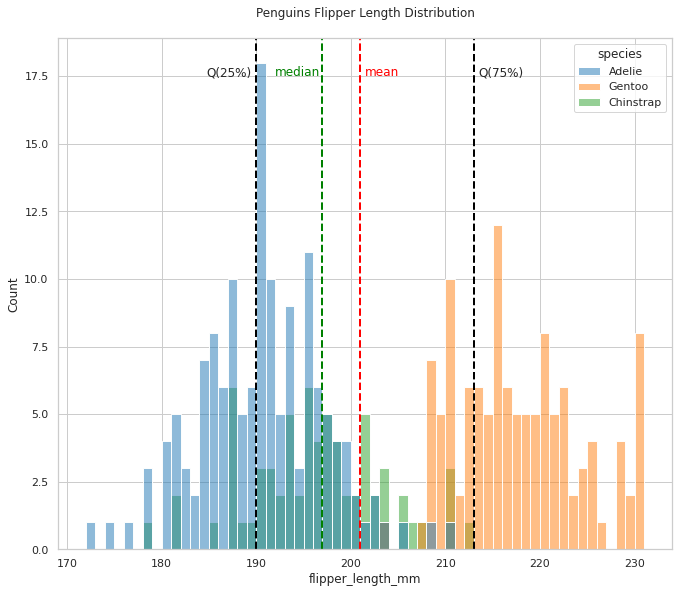

In [ ]:
var_flipper_len = processed_penguin_df['flipper_length_mm']

g=sns.histplot(
    data=processed_penguin_df,
    x='flipper_length_mm',
    binwidth=1,
    hue='species',
    alpha=.5
)
g.set_title('Penguins Flipper Length Distribution', y=1.03)

# Mean(Red)
plt.axvline(
    x =var_flipper_len.mean(),
    linestyle="dashed",
    color="r",
    linewidth=2
)

# Median(Green)
plt.axvline(
    x=var_flipper_len.median(),
    linestyle="dashed",
    color="g",
    linewidth=2
)

# Q_75(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.75),
    linestyle="dashed",
    color="k",
    linewidth=2
)

# Q_25(Black)
plt.axvline(
    x=var_flipper_len.quantile(0.25),
    linestyle="dashed",
    color="k",
    linewidth=2
)

plt.text(184.7,17.5, 'Q(25%)', fontsize=12)
plt.text(192,17.5, 'median', fontsize=12, color='g')
plt.text(201.5,17.5, 'mean', fontsize=12, color='r')
plt.text(213.5,17.5, 'Q(75%)', fontsize=12)

plt.show()


## FUNCIONES DE PROBABULIDAD DE MASAS

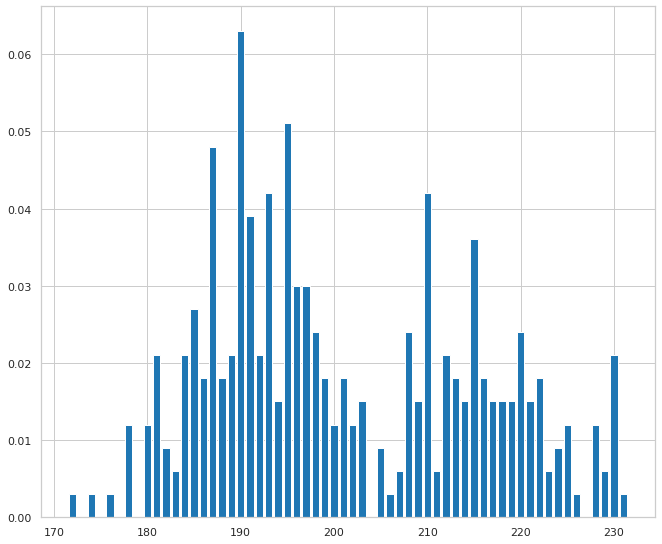

In [ ]:
# Manejamos las probalidades de encontrar medidas tomando la columna 'flipper_length_mm'
pmf_flipper_length_mm= empiricaldist.Pmf.from_seq(
    processed_penguin_df.flipper_length_mm,
    normalize=True
        )
pmf_flipper_length_mm.bar()

In [ ]:
## Con esto podemos preguntar cual es la probabilidad de cualquier cosa segun la columna que elegimos ( ejemplo con 190 mm)
pmf_flipper_length_mm(200)

0.012012012012012012

## FUNCIONES EMPIRICAS DE PROBABILIDAD ACUMULADA

<AxesSubplot:>

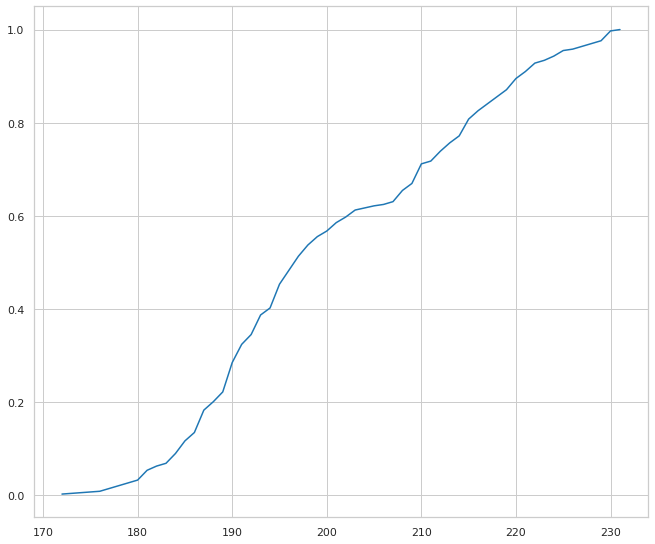

In [ ]:
cdf_flipper_lenght_mm= empiricaldist.Cdf.from_seq(
    processed_penguin_df.flipper_length_mm,
    normalize=True
)
cdf_flipper_lenght_mm.plot()

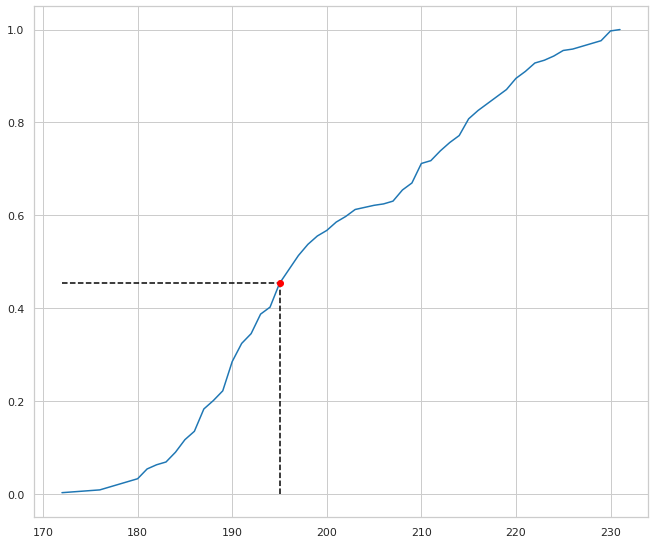

In [ ]:
cdf_flipper_lenght_mm.plot()

q = 195
p = cdf_flipper_lenght_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

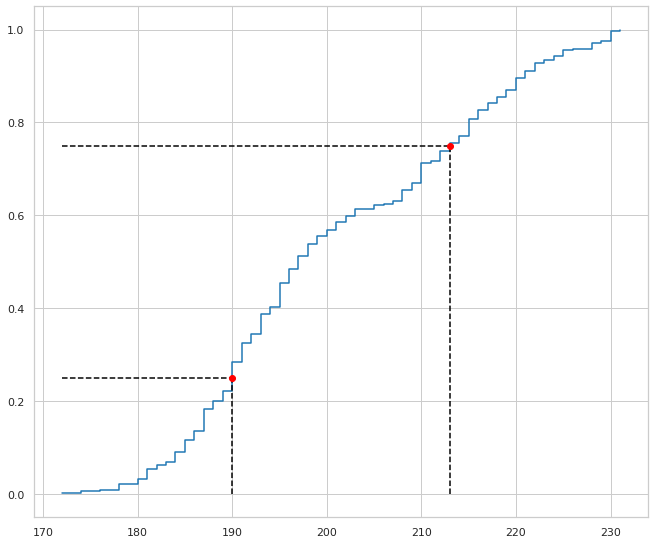

In [ ]:
# AHORA PREGUNTO LOS VALORES Y COLOCO LAS PROBABILIDADES
cdf_flipper_lenght_mm.step ( )
p_1 = 8.25 # Specify probability
P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_lenght_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)


#ESTABLECER RELACIONES ENTRE VARIABLES


<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

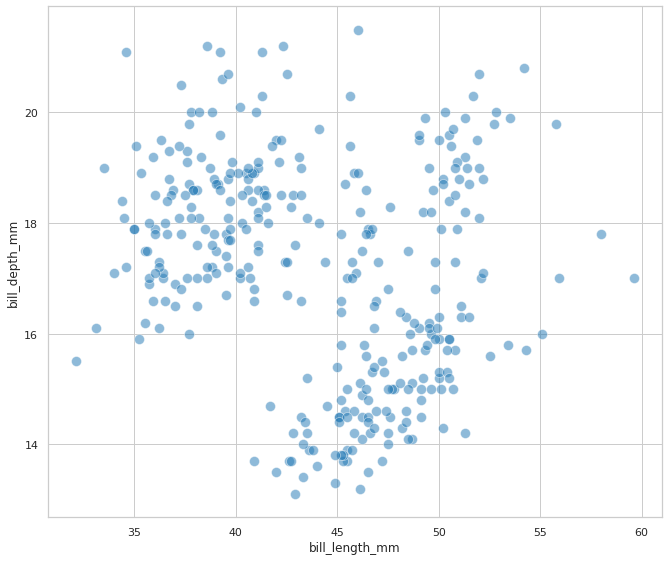

In [ ]:
## GRAFICO DE PUNTOS
sns.scatterplot(
    data=processed_penguin_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm',
    alpha= 1/2, # Para poner un punto me sume dos puntos
    s= 100 #tamaños de los puntos
)

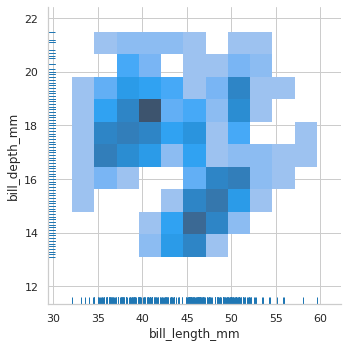

In [ ]:
#HISTOGRAMA
sns.displot(
    data=processed_penguin_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm',
    rug= True #Me  marca esa linea de color azul en los ejes que es donde se acumula mas los puntos
)

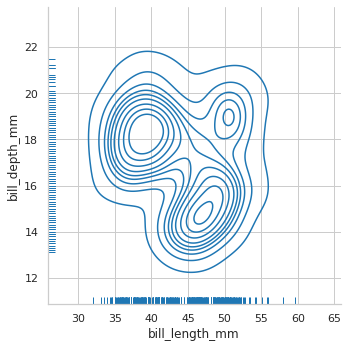

In [ ]:
#HISTOGRAMA
sns.displot(
    data=processed_penguin_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm',
    rug= True, #Me  marca esa linea de color azul en los ejes que es donde se acumula mas los puntos
    kind= 'kde'
)

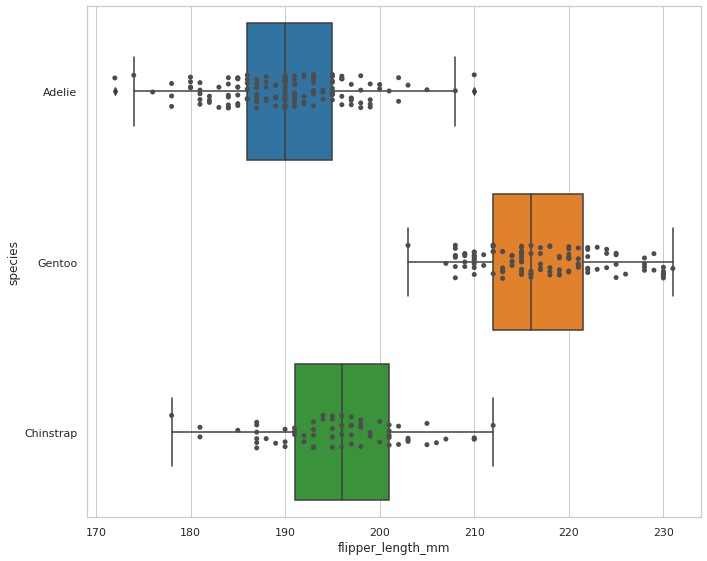

In [ ]:
## Grafico de bloxplot
ax= sns.boxplot(
    data=processed_penguin_df,
    x= 'flipper_length_mm',
    y= 'species'
)
ax=sns.stripplot(
    data=processed_penguin_df,
    x= 'flipper_length_mm',
    y= 'species',
    color='.3'
    )


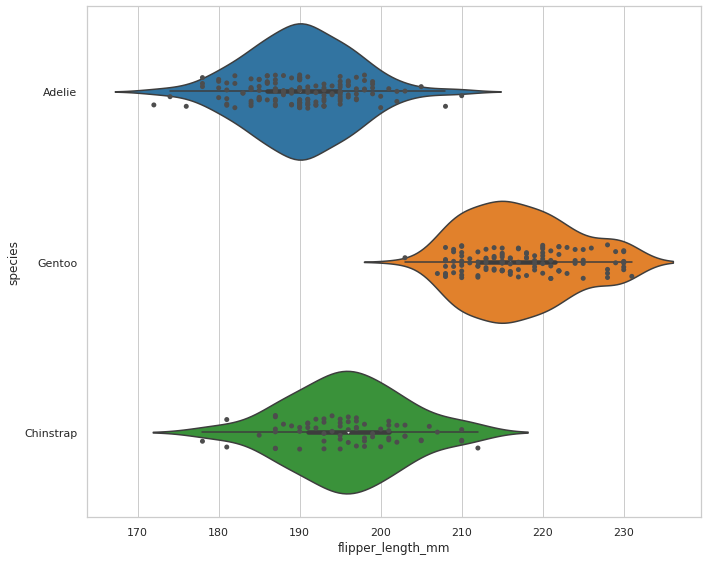

In [ ]:
#GRAFICO DE VIOLIN
ax= sns.violinplot(
    data=processed_penguin_df,
    x= 'flipper_length_mm',
    y= 'species'
)
ax=sns.stripplot(
    data=processed_penguin_df,
    x= 'flipper_length_mm',
    y= 'species',
    color='.3'
    )

# ESTABLCIENDO RELACIONES: MATRICES DE CORRELACION

In [7]:
processed_penguin_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.00,-0.23,0.65,0.59,0.03
bill_depth_mm,-0.23,1.00,-0.58,-0.47,-0.05
flipper_length_mm,0.65,-0.58,1.00,0.87,0.15
body_mass_g,0.59,-0.47,0.87,1.00,0.02
year,0.03,-0.05,0.15,0.02,1.00


<Axes: >

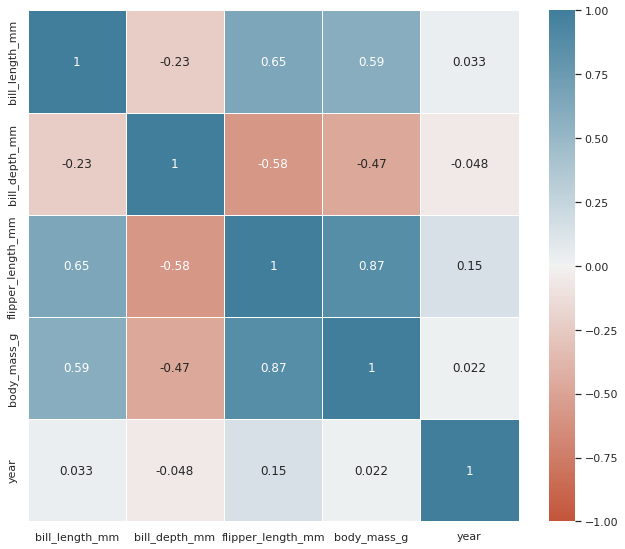

In [11]:
# VISUALIZACION DE CORRELACIONES (Se usa el diverging por que en este caso tenemos valores que divergen de -1 a 1)
sns.heatmap(
    data=processed_penguin_df.corr(),
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

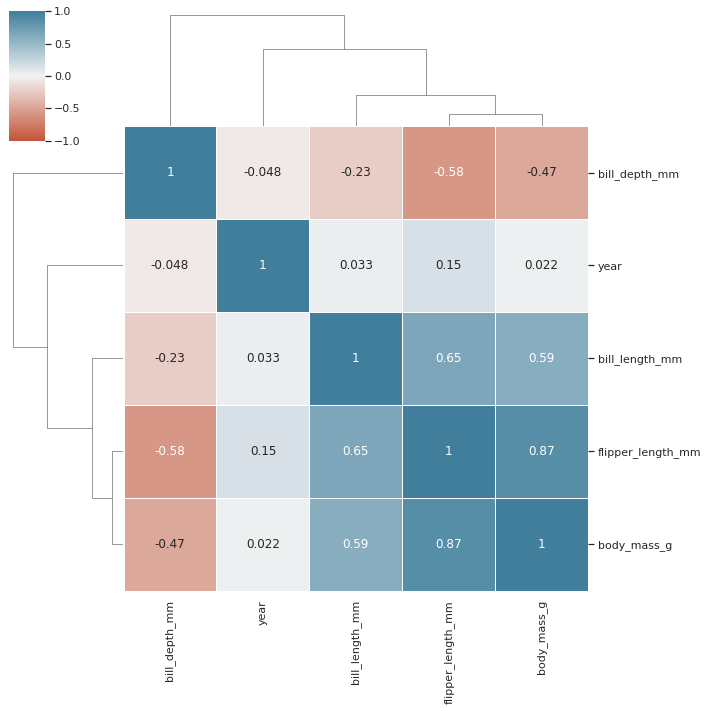

In [14]:
# VISUALIZACION DE CORRELACIONES (AGRUPA TODO)
sns.clustermap(
    data=processed_penguin_df.corr(),
    cmap=sns.diverging_palette(20,230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

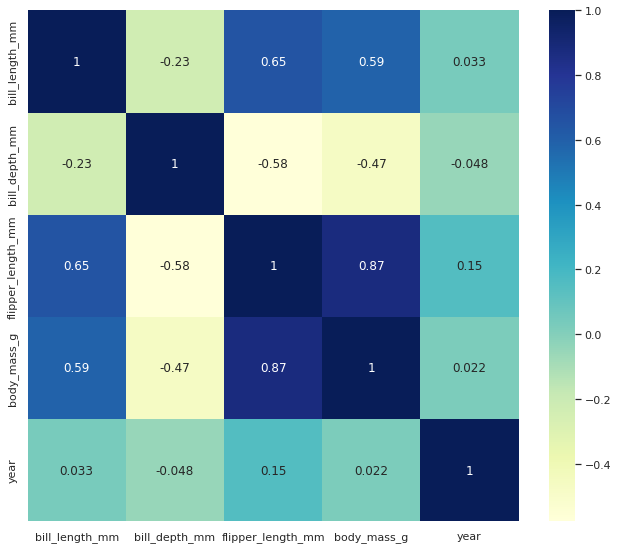

In [13]:
#OPCION N° 2
sns.heatmap(processed_penguin_df.corr(),annot=True,cmap='YlGnBu')
plt.show()

# PARADOJA SIMPSON

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

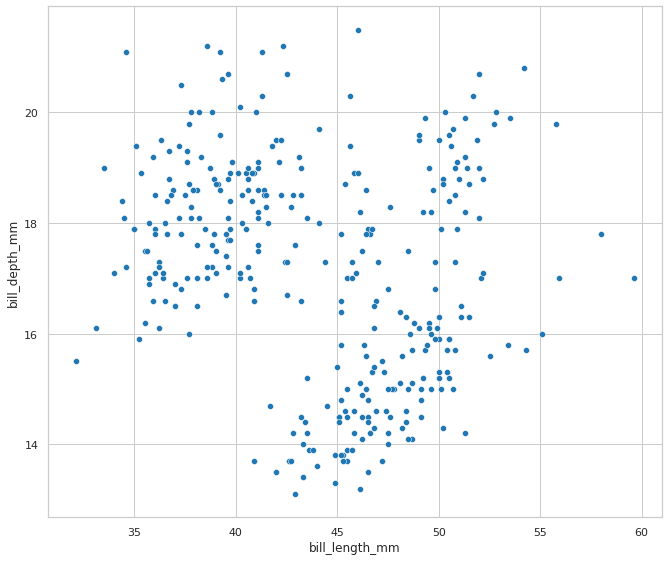

In [9]:
sns.scatterplot(
    data=processed_penguin_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm'
)

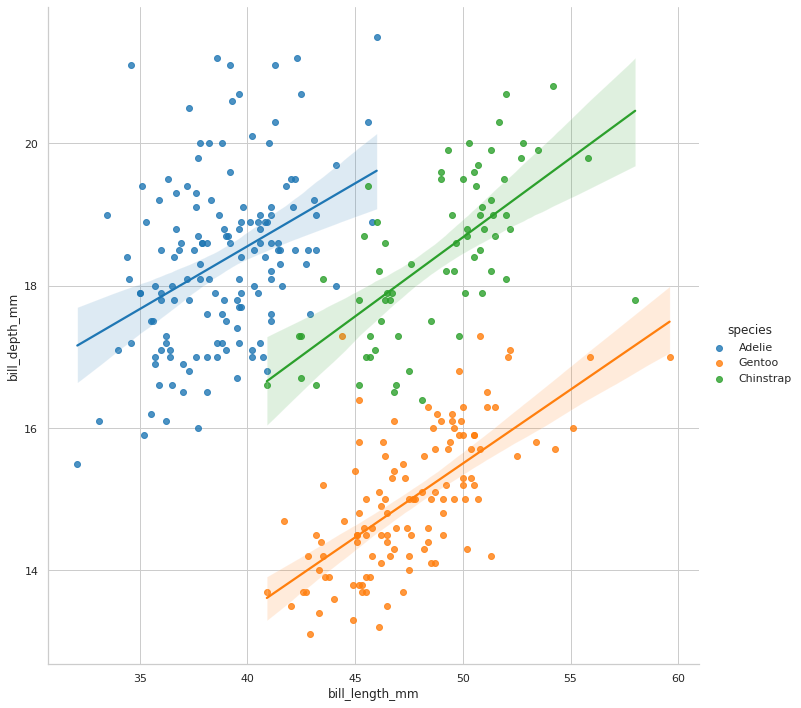

In [14]:
#REGRESION LINEAL
sns.lmplot(
    data=processed_penguin_df,
    x= 'bill_length_mm',
    y= 'bill_depth_mm',
    hue='species',
    height=10  # tamaño
)

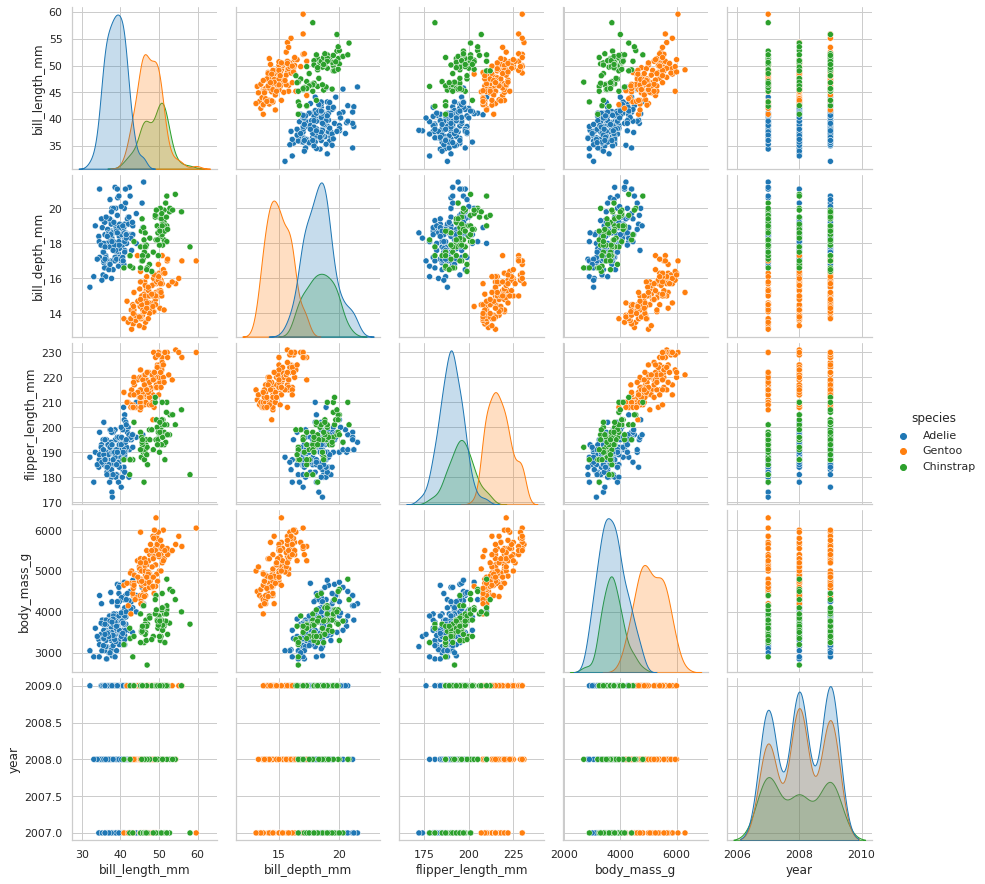

In [15]:
sns.pairplot(
    data= processed_penguin_df,
    hue= 'species'
)